<a href="https://colab.research.google.com/github/ayubuinelektrikndk/Pemrograman_Python/blob/main/Imageclass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [73]:
ls


 3scene@
 Classroom/
'Colab Notebooks'/
'Data Maba.gsheet'
'Getting started.pdf'
'Kartu Ujian dan Lembar Jawaban.pdf'
'LA_GELADI2020_7_1101184201_AYU BUIN ELEKTRIK N.D.K.pdf'
'LH_GELADI2020_ 1_ 1101184201_AYU BUIN ELEKTRIK N.D.K.pdf'
'LH_GELADI2020_ 2_ 1101184201_ AYU BUIN ELEKTRIK N.D.K.pdf'
'LH_GELADI2020_ 3_ 1101184201_AYU BUIN ELEKTRIK N.D.K.pdf'
'LH_GELADI2020_5_ 1101184201_AYU BUIN ELEKTRIK N.D.K.pdf'
'LH_GELADI2020_6_ 1101184201_AYU BUIN ELEKTRIK N.D.K.pdf'
 nnmodel_scene/
 pantai.jpg
'UTS PSWD_Ayu Buin Elektrik N.D.K.pdf'
'WhatsApp Image 2020-09-12 at 18.14.20.jpeg'


In [74]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [75]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [76]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((100, 100))) / 255.0
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [77]:
print(labels)

['forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest', 'forest',

In [78]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [79]:
print(labels)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [80]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 100, 100, 3)
(237, 100, 100, 3)


In [81]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(100*100*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [82]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 30000)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               3000100   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 3,002,039
Trainable params: 3,002,039
Non-trainable params: 0
_________________________________________________________________


In [83]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 1s 29ms/step - loss: 2.0970 - accuracy: 0.3797 - val_loss: 1.1419 - val_accuracy: 0.4388
Epoch 2/25
23/23 [==============================] - 1s 23ms/step - loss: 0.9284 - accuracy: 0.5359 - val_loss: 1.0275 - val_accuracy: 0.4641
Epoch 3/25
23/23 [==============================] - 1s 24ms/step - loss: 0.8042 - accuracy: 0.6470 - val_loss: 0.9324 - val_accuracy: 0.5949
Epoch 4/25
23/23 [==============================] - 1s 23ms/step - loss: 0.7075 - accuracy: 0.6920 - val_loss: 0.9181 - val_accuracy: 0.6245
Epoch 5/25
23/23 [==============================] - 1s 23ms/step - loss: 0.6279 - accuracy: 0.7440 - val_loss: 1.2208 - val_accuracy: 0.5274
Epoch 6/25
23/23 [==============================] - 1s 23ms/step - loss: 0.6134 - accuracy: 0.7553 - val_loss: 0.8386 - val_accuracy: 0.6751
Epoch 7/25
23/23 [==============================] - 1s 23ms/step - loss: 0.6938 - accuracy: 0.7032 - val_loss: 0.8098 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


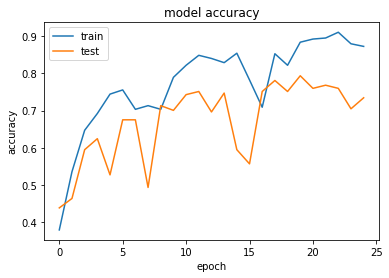

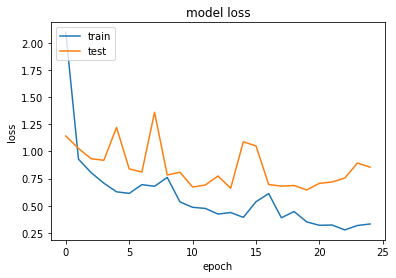

In [84]:
import matplotlib.pyplot as plt

print(H.history.keys())

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.65      0.93      0.76        88
      forest       0.96      0.66      0.79        80
     highway       0.71      0.57      0.63        69

    accuracy                           0.73       237
   macro avg       0.77      0.72      0.73       237
weighted avg       0.77      0.73      0.73       237



In [86]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [87]:
import cv2
import matplotlib.pyplot as plt
image1='pantai.jpg'

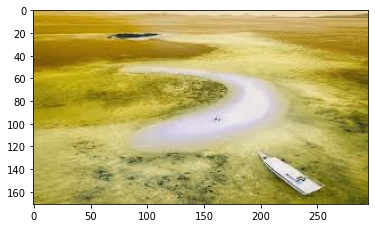

In [88]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [89]:
image_testing = Image.open('pantai.jpg')
image_testing = np.array(image_testing.resize((100, 100))) / 255.0
image_testing.shape

(100, 100, 3)

In [90]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 100, 100, 3)


In [92]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[7.3204857e-01 4.7546890e-04 2.6747605e-01]]
['coast']
